In [1]:
# Importing packages
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Loading the forecasts
path = "plots\\forecasts_guaiba.csv"
df = pd.read_csv(path)
df['observed_1h-ahead'] = df['observado']
df['observed_6h-ahead'] = df['observado']
df['observed_12h-ahead'] = df['observado']
df['observed_24h-ahead'] = df['observado']
df = df.drop(columns='observado')
df

,datahora,sarima_1h-ahead,sarima_6h-ahead,sarima_12h-ahead,sarima_24h-ahead,arima_12h-ahead,elasticnet_1h-ahead,elasticnet_6h-ahead,elasticnet_12h-ahead,elasticnet_24h-ahead,...,linearsvr_6h-ahead,linearsvr_12h-ahead,nusvr_1h-ahead,nusvr_6h-ahead,nusvr_24h-ahead,mlpregressor_24h-ahead,observed_1h-ahead,observed_6h-ahead,observed_12h-ahead,observed_24h-ahead
0,2024-04-29 14:00:00,119.11,119.47,133.70,149.47,129.38,120.860947,124.060622,122.838582,122.921876,...,122.264068,120.080114,120.385851,122.750655,121.540585,128.566111,121.0,121.0,121.0,121.0
1,2024-04-29 15:00:00,119.56,121.62,134.14,152.13,128.30,121.956281,125.106534,121.961701,122.384420,...,122.562061,119.328181,121.345084,122.611088,120.856085,128.063543,121.0,121.0,121.0,121.0
2,2024-04-29 16:00:00,121.60,122.18,131.25,147.17,127.08,122.205914,123.622509,121.673258,122.435671,...,122.091863,119.029492,121.502774,122.063746,120.975619,128.207648,119.0,119.0,119.0,119.0
3,2024-04-29 17:00:00,122.02,120.59,131.83,144.27,128.47,120.238222,125.901458,120.797940,122.675037,...,122.411792,118.130036,119.554680,122.364153,121.216471,128.463342,119.0,119.0,119.0,119.0
4,2024-04-29 18:00:00,118.07,120.18,130.43,149.03,126.84,120.641599,124.282278,119.375768,121.949959,...,121.862995,116.555396,119.475555,121.705600,120.488583,127.848097,116.0,116.0,116.0,116.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2024-05-07 9:00:00,528.00,528.80,545.37,540.10,540.34,527.793259,505.980054,481.393293,465.623976,...,512.714184,474.018920,530.413035,507.321471,461.780594,461.170042,527.0,527.0,527.0,527.0
188,2024-05-07 10:00:00,526.22,526.99,539.20,547.51,533.20,527.779089,506.758939,479.512963,463.822134,...,512.639947,472.203921,530.428759,507.223758,460.120973,459.374520,528.0,528.0,528.0,528.0
189,2024-05-07 11:00:00,524.78,521.98,531.20,532.61,524.14,528.749226,505.832849,480.022353,464.162490,...,511.741378,472.685415,531.434021,506.287141,460.460925,459.616788,527.0,527.0,527.0,527.0
190,2024-05-07 12:00:00,531.53,528.41,528.30,534.43,528.40,527.746125,504.983278,479.391340,464.662161,...,512.490118,472.087464,530.444021,507.024553,460.952757,459.911342,526.0,526.0,526.0,526.0


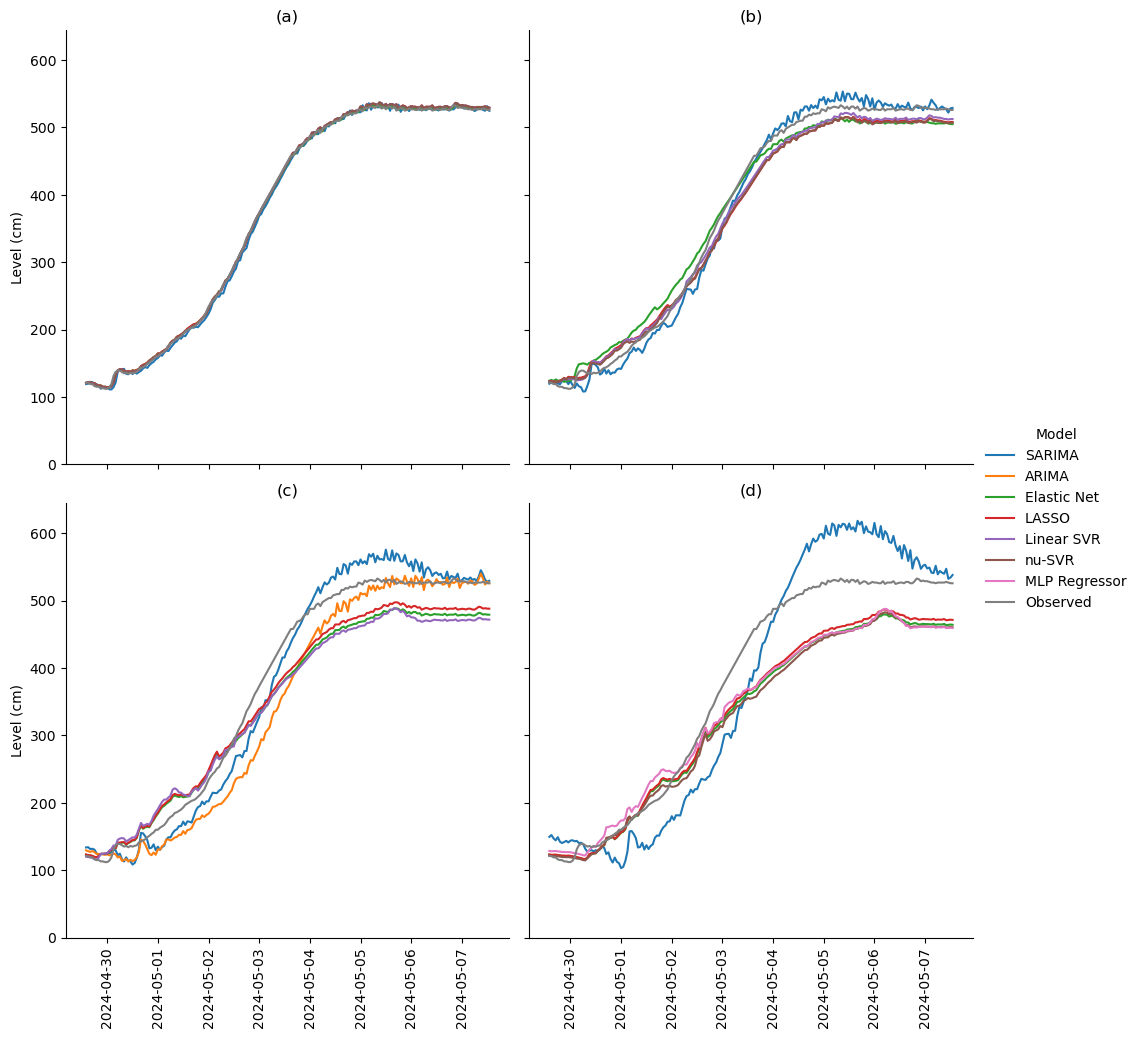

In [2]:
# Reorganizing the dataframe from wide to long
df_long = pd.melt(df, id_vars=["datahora"], value_name='Level (cm)')

# Separating model and lead time into columns
df_long[['Model', 'Lead time']] = df_long['variable'].str.split('_',expand=True)

# Renaming the models
df_long = df_long.replace(["sarima", "arima", "lasso", "elasticnet", "linearsvr", "nusvr", "mlpregressor", "plsregression", "observed"], ["SARIMA", "ARIMA", "LASSO", "Elastic Net", "Linear SVR", "nu-SVR", "MLP Regressor", "PLS Regression", "Observed"])

# Dropping unnecessary column
df_long = df_long.drop(columns=['variable'])

# Converting datahora to datetime format
df_long['datahora'] = pd.to_datetime(df_long['datahora'])

# Plotting by lead time
g1 = sns.relplot(
    data=df_long,
    x='datahora', y="Level (cm)", col="Lead time", col_wrap=2,
    kind="line", hue = "Model")
g1.set(ylim=(0, None), xlabel=None)
g1.axes[0].set_title('(a)')
g1.axes[1].set_title('(b)')
g1.axes[2].set_title('(c)')
g1.axes[3].set_title('(d)')
g1.tick_params(axis='x', rotation=90)

g1.figure.savefig('plots\\Fig4.png')